In [111]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import tools

# load modules related to this exercise
import model_project as model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
### children probabilities ###

# 1. settings
age_min = 25 # age at which the model starts
age_fer = 45 # maximum age of fertility
T = 35       # maximum periods from age_min needed to solve the model
num_n = 3    # maximum number of children

# 2. Child arrival probabilities
# i. allocate memory
shape = (num_n+1,T+1)
p = np.nan + np.zeros(shape)

# ii. load calibrations
birth_df = pd.read_excel('cali_birth_prob.xls') 
birth_df = birth_df.groupby(['nkids','age']).mean().reset_index()

# iii. Pick out relevant based on age and number of children
age_grid = np.array([age for age in range(age_min,age_min+T+1)])
for n in range(num_n+1):
    for iage,age in enumerate(age_grid):
        p[n,iage] = birth_df.loc[ (birth_df['age']==age) & (birth_df['nkids']==n) ,['birth']].to_numpy()

        if (age>age_fer) or (n==(num_n)):
            p[n,iage] = 0.0

In [113]:
# solve the model
par = model.setup()
par.theta0 = 0
par.theta1 = 0.2
par.N = 3

par = model.create_grids(par)
sol = model.solve(par)

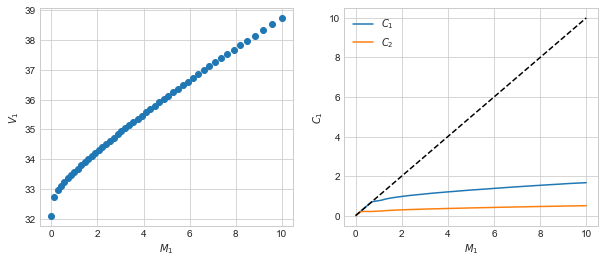

In [114]:
# Define a function for the solution
def plot_solution(sol,par,t):
    fig = plt.figure(figsize=(10,4))# figsize is in inches...
    
    ax = fig.add_subplot(1,2,1)
    ax.scatter(par.grid_M,sol.V[t])
    ax.set_xlabel(f"$M_{t+1}$")
    ax.set_ylabel(f"$V_{t+1}$")

    ax_right = fig.add_subplot(1,2,2)
    ax_right.plot(par.grid_M,sol.c1[t])
    ax_right.plot(par.grid_M,sol.c2[t])
    ax_right.plot(par.grid_M,par.grid_M,color='black',linestyle='dashed')
    ax_right.set_xlabel(f"$M_{t+1}$")
    ax_right.set_ylabel(f"$C_{t+1}$")
    ax_right.legend(['$C_1$','$C_2$'])
    plt.show()

plot_solution(sol,par,0)